In [43]:
%matplotlib inline

#Imports
from matplotlib.pylab import *
import matplotlib.pylab as plt
import numpy as np
import matplotlib.gridspec as gridspec

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rcParams['font.size'] = 20.0

In [28]:
def maxwell_v(m,T,N,v):
    #2d maxwell dn/dv
    k_b = 1.3806488e-16 #k_b in cgs
    tmp = m*N/(k_b*T)
    tmp *= v*np.exp(-m*v*v/(2.0*k_b*T))
    return tmp

def maxwell_e(m,T,N,E):
    #2d maxwell dn/dE
    k_b = 1.3806488e-16 #k_b in cgs
    tmp = N/(k_b*T)
    tmp *= np.exp(-E/(k_b*T))
    return tmp
    
def compute_v(m,T):
    k_b = 1.3806488e-16 #k_b in cgs
    return np.sqrt(3.0*T*k_b/m)

def compute_v_mean(m,T):
    k_b = 1.3806488e-16 #k_b in cgs
    return np.sqrt(8.0*k_b*T/(np.pi*m))

In [29]:
m_p = 1.6726219e-24
T = 273.0 #temp in kelvin
v = compute_v(m_p,T)
N = 100

In [92]:
"""
data1 = np.genfromtxt("output1.dat")
data2 = np.genfromtxt("output2.dat")
data3 = np.genfromtxt("output3.dat")
data4 = np.genfromtxt("output4.dat")
data5 = np.genfromtxt("output5.dat")
data6 = np.genfromtxt("output6.dat")
data7 = np.genfromtxt("output7.dat")
data8 = np.genfromtxt("output8.dat")
data9 = np.genfromtxt("output9.dat")
data10 = np.genfromtxt("output10.dat")
"""
cwd = "/Users/dflemin3/Desktop/Career/Grad Classes/Astr_507/boxSim"
data = np.genfromtxt(cwd+"/output.dat")

#1st 100 rows = ICs, 2nd 100 = final
#data_init = np.concatenate((data1[:100],data2[:100],data3[:100],data4[:100],data5[:100],
#                           data6[:100],data7[:100],data8[:100],data9[:100],data10[:100]))
#data_final = np.concatenate((data1[100:],data2[100:],data3[100:],data4[100:],data5[100:],
#                            data6[100:],data7[100:],data8[100:],data9[100:],data10[100:]))

data_init = data[:100]
data_final = data[-100:]

pos_init = data_init[:,1:3]/8.775e-14
vel_init = data_init[:,3:]

pos_final = data_final[:,1:3]/8.775e-14
vel_final = data_final[:,3:]

vel_init = np.sqrt(vel_init[:,0]**2 + vel_init[:,1]**2)
vel_final = np.sqrt(vel_final[:,0]**2 + vel_final[:,1]**2)

#Create data histogram for scaling purposes
#Final velocity histogram
vel_final_hist, bin_edges = np.histogram(vel_final, bins=30, density = True)
vel_final_hist = vel_final_hist * N #Scale so integral gives particle number
v_bin_center = (bin_edges[:-1] + bin_edges[1:])/2.0

e_init = 0.5*m_p*(vel_init*vel_init)
e_final = 0.5*m_p*(vel_final*vel_final)

#Final Energy Histogram
e_final_hist, bin_edges = np.histogram(e_final, bins=30, density = True)
e_final_hist = e_final_hist * N #Scale so integral gives particle number
e_bin_center = (bin_edges[:-1] + bin_edges[1:])/2.0

v_f = np.linspace(0.0,vel_final[mask].max(),200)
e_f = np.linspace(e_final.min(),e_final.max(),200)

fit = maxwell_v(m_p,T,N,v_f)
fit_mass = maxwell_v(10.0*m_p,T,N,v_f)
fit_e = maxwell_e(m_p,T,N,e_f)
fit_e_mass = maxwell_e(10*m_p,T,N,e_f)

In [ ]:
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,12)

gs = gridspec.GridSpec(2, 1)
gs.update(hspace=0.25)

ax3 = plt.subplot(gs[0])
ax3.hist(vel_init, 35, normed=0, facecolor='green', alpha=0.75)
ax3.set_xlabel(r"speed [cm s$^{-1}$]")
ax3.set_ylabel("Counts")
ax3.set_title("Initial Velocity Distribution")

ax4 = plt.subplot(gs[1])
ax4.step(v_bin_center,vel_final_hist, alpha=0.75,linewidth=5,label="Simulation")
ax4.plot(v_f,fit_mass,color='red',linewidth=4,label="Maxwell Dist T = 273K")
ax4.plot(v_f,fit,color='green',linewidth=4,label="Maxwell Dist T = 273K")

ax4.set_title("Final Velocity Distribution")

ax4.set_ylabel("Density")
ax4.set_xlabel(r"speed [cm s$^{-1}$]")

plt.legend()
#plt.savefig("vel_dist.eps",bbox_inches="tight")

# Determine when simulation converges

In [161]:
#Evolve v distribution, see when it reaches steady state
plt.rcParams['figure.figsize'] = (8,8)
data = np.genfromtxt(cwd+"/output.dat")

eps = 0.01

pos = data[:,1:3]/8.775e-14
vel = data[:,3:]
dt = data[100,0] - data[0,0]

vel = np.sqrt(vel[:,0]**2 + vel[:,1]**2)

tmp = []

hist_len = 20
v =np.linspace(1,650000,hist_len)
theo_hist = maxwell_v(m_p,T,N,v)/N

for i in range(1,len(data)/100):
    beg = i*100
    end = beg+100
    #Final velocity histogram
    vel_hist, bin_edges = np.histogram(vel[beg:end], bins=hist_len, density = True)
    
    tmp.append(np.sum((vel_hist - theo_hist)**2/theo_hist))
    #See if it converged
    if((np.sum((vel_hist - theo_hist)**2/theo_hist)) < eps):
        print i, i * dt
        
        #Plot to confirm
        #plt.hist(vel[beg:end],bins=hist_len, normed=1)
        #plt.plot(v_f,fit/N,color='red',linewidth=4,label="Maxwell Dist T = 273K")

        
        break

949 1.056917433e-16


In [162]:
SIZE = 8.775e-14
v = compute_v(m_p,T)
print 100/(SIZE*100*SIZE*100)
n_fixed = 100.0/(50*50*SIZE*SIZE)

def tau(a,n,v):
    return 1.0/(2.0*a*n*v)

#For box that is (100*SIZE)^2
a_arr = np.asarray([0.1*SIZE,0.5*SIZE,SIZE,5*SIZE])
a_res = np.asarray([5.716709361e-17,7.7960204e-18,4.2321246e-18,5.568586e-19])
tau_a = tau(a_arr,n_fixed,v)

n_arr = 100.0/(np.asarray([(50.*SIZE)**2,(100.*SIZE)**2,(200.*SIZE)**2,(400.*SIZE)**2]))
n_res = np.asarray([1.6705755e-18,1.84877022e-17,4.02051837e-17,1.056917433e-16])
tau_n = tau(SIZE,n_arr,v);
print tau_n

1.29869075738e+24
[  4.21864001e-18   1.68745600e-17   6.74982401e-17   2.69992960e-16]


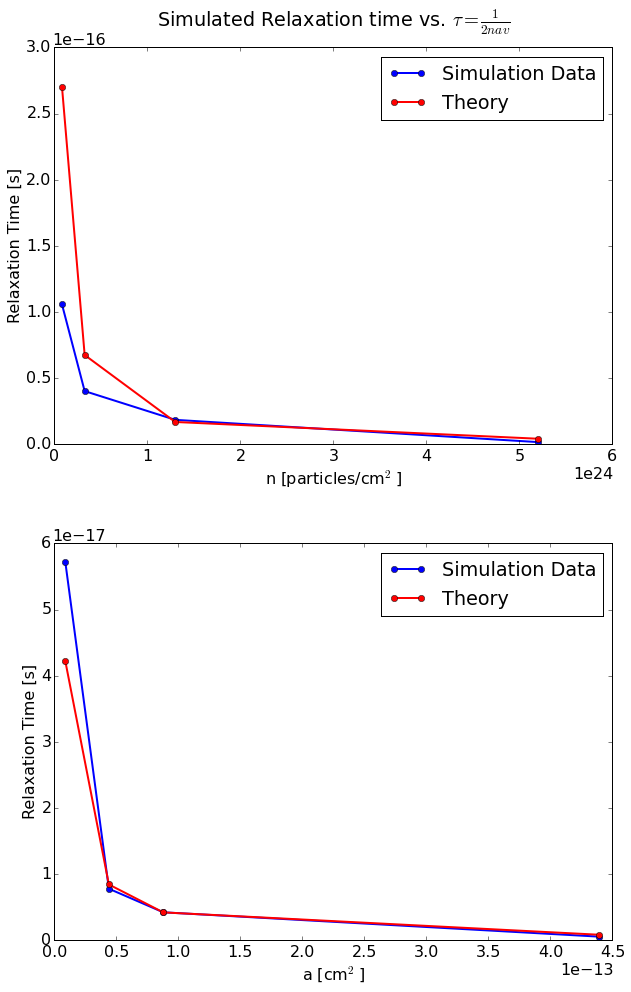

In [182]:
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (10,16)
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 1)
gs.update(hspace=0.25)

#Top plot: P vs T
ax1 = plt.subplot(gs[0])
ax1.plot(n_arr,n_res,'o-',label="Simulation Data",linewidth=2)
ax1.plot(n_arr,tau_n,'o-',color='red',linewidth=2,label="Theory")
#ax1.semilogy()
#ax1.semilogx()
ax1.set_xlabel("n [particles/cm$^2$]")
ax1.set_ylabel(r"Relaxation Time [s]")
#ax1.set_xlim(90,T_arr.max()+1000)
ax1.set_title(r"Simulated Relaxation time vs. $\tau = \frac{1}{2nav}$",y=1.04)

plt.legend(loc='upper right')

#Bottom plot: P vs n
ax2 = plt.subplot(gs[1])
ax2.plot(a_arr,a_res,'o-',label="Simulation Data",linewidth=2)
ax2.plot(a_arr,tau_a,'o-',color='red',linewidth=2,label="Theory")
#ax2.semilogy()
#ax2.semilogx()
ax2.set_xlabel("a [cm$^2$]")
ax2.set_ylabel(r"Relaxation Time [s]")
plt.legend(loc='upper right')

#plt.savefig("tau.eps",bbox_inches="tight")

# Plot initial, final particle positions

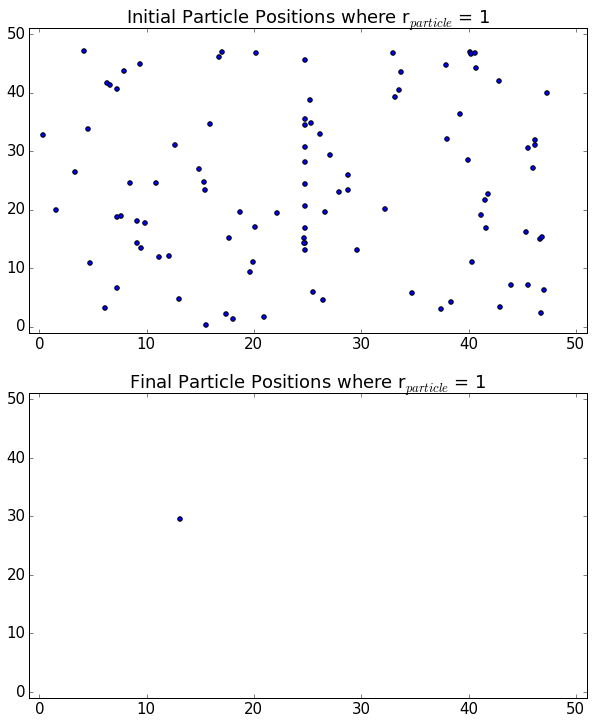

In [17]:
#Plot initial, final particle positions
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,12)

gs = gridspec.GridSpec(2, 1)
gs.update(wspace=0.25)

ax1 = plt.subplot(gs[0])
ax1.scatter(pos_init[::10,0],pos_init[::10,1])
ax1.set_xlim(-1,51)
ax1.set_ylim(-1,51)
ax1.set_title("Initial Particle Positions where r$_{particle}$ = 1")

ax2 = plt.subplot(gs[1])
ax2.scatter(pos_final[::10,0],pos_final[::10,1])
ax2.set_xlim(-1,51)
ax2.set_ylim(-1,51)
ax2.set_title("Final Particle Positions where r$_{particle}$ = 1")
#plt.savefig("pos_dist.eps",bbox_inches="tight")

In [ ]:
#Energy distribution plots
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,12)

gs = gridspec.GridSpec(2, 1)
gs.update(hspace=0.25)

ax3 = plt.subplot(gs[0])
ax3.hist(e_init, 35, normed=0, facecolor='green', alpha=0.75)
ax3.set_xlabel(r"energy [ergs]")
ax3.set_ylabel("Counts")
ax3.set_title("Initial Energy Distribution")

ax4 = plt.subplot(gs[1])
ax4.step(e_bin_center,e_final_hist, alpha=0.75,linewidth=5,label='Simulation')
ax4.plot(e_f,fit_e,color='red',linewidth=4,label="Maxwell Dist T = 273K")
ax4.set_title("Final Energy Distribution")
ax4.set_ylabel("Density")
ax4.set_xlabel(r"energy [ergs]")

plt.legend()
#plt.savefig("energy_dist.eps",bbox_inches='tight')

In [ ]:
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,6)

plt.hist(e_final, 35, normed=1, facecolor='green', alpha=0.75,label=r"All $m_p$")
#plt.hist(e_final_mass, 35, normed=1, facecolor='blue', alpha=0.5,label=r"Half $10m_p$")
plt.ylabel("Density")
plt.xlabel(r"energy [ergs]")
plt.legend()
#plt.savefig("energy_comp.eps",bbox_inches='tight')

# Plots that show code maintains P = nkT

In [ ]:
size = 8.775e-14 #cm
k_b = 1.3806488e-16 #k_b in cgs
T = 273 #Fixed T, n varies
n = 100.0/((50.0*size)**2.)

def pressure(n,T):
    k_b = 1.3806488e-16 #k_b in cgs
    return n*k_b*T

print pressure(n,T)

In [ ]:
#P vs T
T_arr = np.asarray([100.0,300.0,500.0,1000.0,2500.0,5000.0,7500.0,10000.0,20000.0])
PT_arr = np.asarray([1.683015e+11,4.758292e+11,7.925421e+11,1.727642e+12,4.386263e+12,
                    7.225815e+12,1.207155e+13,1.659404e+13,3.266060e+13])

SIZE = size

#P vs n
n_arr = np.asarray([1.0/(SIZE*SIZE*50*50),1.0/(SIZE*SIZE*100*100),1.0/(SIZE*SIZE*200*200),
                   1.0/(SIZE*SIZE*400*400),1.0/(SIZE*SIZE*800*800)])*100.0
Pn_arr = np.asarray([4.337695e+11,1.223321e+11,2.756479e+10,6.383140e+09,1.471349e+09])

#Reverse arrays
n_arr = n_arr[::-1]
Pn_arr = Pn_arr[::-1]

#Define fits
Pn_fit = pressure(n_arr,T)
PT_fit = pressure(n,T_arr)

In [ ]:
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (10,16)
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 1)
gs.update(hspace=0.25)

#Top plot: P vs T
ax1 = plt.subplot(gs[0])
ax1.scatter(T_arr,PT_arr,label="Simulation Data",s=50)
ax1.plot(T_arr,PT_fit,color='red',linewidth=2,label="P=nkT")
ax1.semilogy()
ax1.semilogx()
ax1.set_xlabel("Temperature (K)")
ax1.set_ylabel(r"Pressure [g s${^-2}$]")
ax1.set_xlim(90,T_arr.max()+1000)
ax1.set_title("Cumulative Pressure for n = %.1e particles/cm$^2$" %n)

plt.legend(loc='upper left')

#Bottom plot: P vs n
ax2 = plt.subplot(gs[1])
ax2.scatter(n_arr,Pn_arr,label="Simulation Data",s=50)
ax2.plot(n_arr,Pn_fit,color='red',linewidth=2,label="P=nkT")
ax2.semilogy()
ax2.semilogx()
ax2.set_xlabel("n [particles/cm$^2$]")
ax2.set_ylabel(r"Pressure [g s${^-2}$]")
ax2.set_xlim(1.0e22,n_arr.max()+5.0e24)
ax2.set_title("Cumulative Pressure for T = %d K" % T)
plt.legend(loc='upper left')

#plt.savefig("pv_nrt.eps",bbox_inches="tight")

In [ ]:
cols = np.genfromtxt(cwd+"/mean_v.dat")
dt = cols[1,0] - cols[0,0]
print dt
time = dt*np.linspace(0,len(cols),len(cols))

In [ ]:
lim = len(time)-1
min_lim = 0
v_m =compute_v_mean(m_p,T)
col_mean = np.median(cols[:,1])
col_std = np.std(cols[:,1])

print(col_mean)
print(col_std)

plt.scatter(time[min_lim:lim],cols[min_lim:lim,1])

plt.axhline(y=col_mean, xmin=0, xmax=1, linewidth=2, color = 'k')
plt.axhline(y=v_m, xmin=0, xmax=1, linewidth=2, color = 'red')

plt.fill_between(time,col_mean-2*col_std,col_mean+2*col_std,alpha=0.25)


#plt.ylim(col_mean-(2*col_std),col_mean+(2*col_std))
plt.xlim(time[min_lim],time[lim])